In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import linregress
import numpy as np

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Data Visualization:

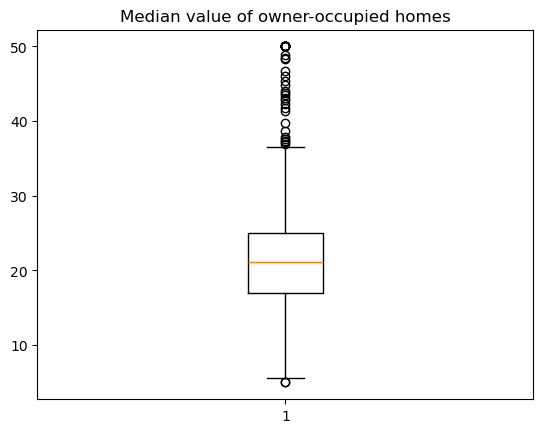

In [4]:
plt.boxplot(boston_df["MEDV"])
plt.title("Median value of owner-occupied homes")
plt.show()


# Box plot of meadian value of owner-occupied homes

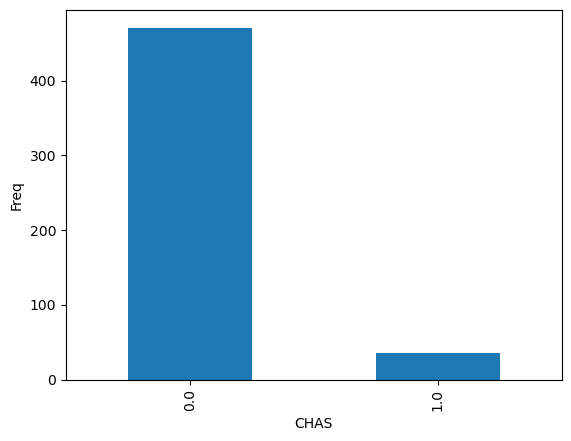

In [6]:
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.xlabel('CHAS')
plt.ylabel('Freq')
plt.title("Bar Chart ")
plt.show()

# Bar Chart depicting number of homes with tract bound river (1) and not (0)


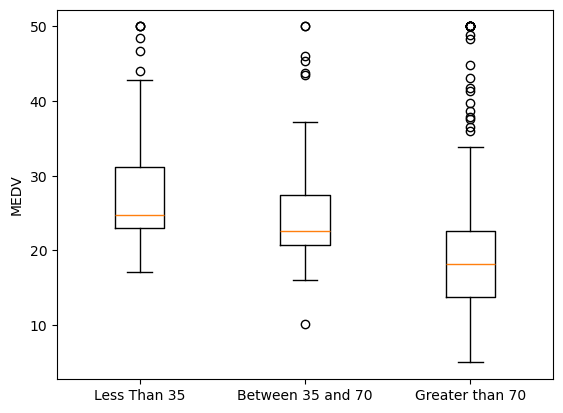

In [9]:
plt.boxplot([boston_df[boston_df["AGE"] <= 35]["MEDV"], boston_df[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70)]["MEDV"], 
            boston_df[boston_df["AGE"] >= 70]["MEDV"]], labels = ["Less Than 35", "Between 35 and 70", "Greater than 70"])
plt.ylabel("MEDV")
plt.show()

# Box plot of Median Value sorted by Age 

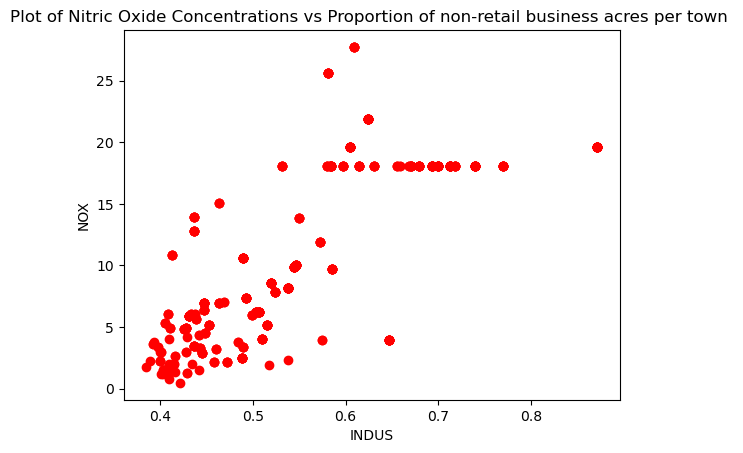

In [7]:
plt.scatter(boston_df["NOX"], boston_df["INDUS"], c = "RED")
plt.xlabel("INDUS")
plt.ylabel("NOX")
plt.title("Plot of Nitric Oxide Concentrations vs Proportion of non-retail business acres per town ")
plt.show()

# Scatter plot of Nitric Conc. vs Proportion of non retail business acres per town

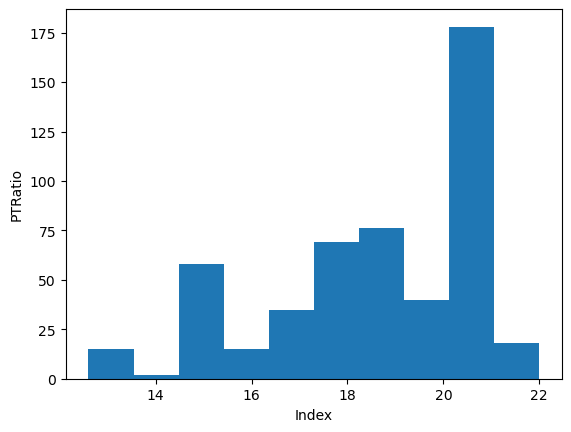

In [11]:
plt.hist(boston_df["PTRATIO"])
plt.xlabel("Index")
plt.ylabel("PTRatio")
plt.show()

# Histrogram for the pupit to teacher ratio

# Hypothesis Testing:

# Test 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

    # Null Hypothesis: There is no significant difference in the median value of the houses bounded by Charles river and not
    # Alternate hypothesis: There is a significant difference in the median value of houses

# Check the skewness of the data

In [12]:
print(boston_df[boston_df["CHAS"] == 0]["MEDV"].skew())
print(boston_df[boston_df["CHAS"] == 1]["MEDV"].skew())

1.0569081379984129
0.9430116716109092


# Data is skewed and right skewed, hence should be transformed  

In [84]:
transform_data1 = np.log1p(boston_df[boston_df["CHAS"] == 0]["MEDV"])
transform_data2 = np.log1p(boston_df[boston_df["CHAS"] == 1]["MEDV"])

In [85]:
print(transform_data1.skew())
print(transform_data2.skew())

-0.3030605424672147
0.47197088607280213


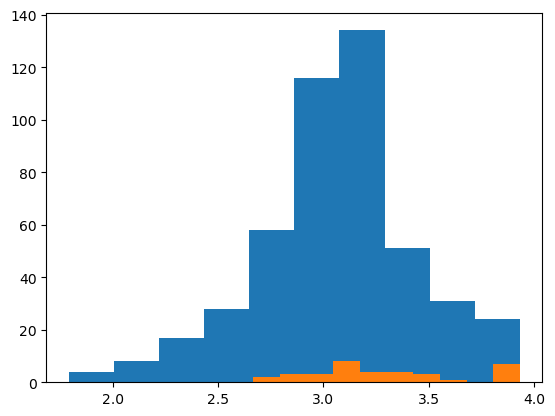

In [90]:
plt.hist(transform_data1)
plt.hist(transform_data2)
plt.show()

# now skewness is between -0.5 & 0.5 

# Check if the variance of the two datasets are equal or not

In [82]:
 stat, p_value = levene(transform_data1, transform_data2)
print(stat, p_value)

1.459802773481544 0.22752809926121373


# Since p_value > 0.05 the variance is equal

# Run the t-test

In [87]:
t_stat, p_value = stats.ttest_ind(transform_data1, transform_data2
                                  , equal_var = True)
print(t_stat, p_value)

-3.6256870941475605 0.0003174947434466864


# Since p_value is < 0.05 hypothesis has failed and the means are unequal. Hence, the alternate hypothesis is true

# Test 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

    # Null hypothesis: There is no significant difference in median values of houses for the units built prior to 1940 and others
    # Alternate hypothesis: There is a significant difference in the median values of houses for the units built prior to 1940

In [102]:
print(boston_df["AGE"].max())
print(boston_df["AGE"].min())

100.0
2.9


# Run One Way Annova Test (f-Test)

In [8]:
stat, p_value = f_oneway(boston_df[boston_df["AGE"] <= 33]["MEDV"], boston_df[(boston_df["AGE"] > 33) & 
                            (boston_df["AGE"] < 66)]["MEDV"], boston_df[boston_df["AGE"] >= 66]["MEDV"]) 
print(stat, p_value)

32.2868064078215 6.423413089231037e-14


# Since p_value is < 0.05 hypothesis has filed and the means are unequal. Hence, null hypothesis has failed and there is a significant difference in the median value of houses built prior to 1940

# Test 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
    # Null Hypothesis: No correlation exists between NOX and proportion of non-retail business acerage
    # Alternate Hypothesis: There is a correlation between NOX and proportion of non-retail business acerage

In [115]:
corr, val = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(corr, val)

0.763651446920915 7.913361061241167e-98


# Positive correlation do exists NOX and INDUS, null hypothesis has failed and there exists a positive correlation

# Test 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [122]:
result = linregress(boston_df["DIS"], boston_df["MEDV"])

In [123]:
print(f"R2 : {result.rvalue**2}")

R2 : 0.06246437212178245


In [124]:
print(result.slope)

1.0916130158411095


# For each unit increase in the weightd distance to the 5 Boston employment centres the median values goes up by 1.0916130 Units